## Business Understanding
### We need to understand the factors contributing to the success of startups in india ecosystem. 


### Hypothesis:
* H0: Sector does not really contribute to the success of a Startup in India.
* H1: Sector can contribute to the success of a Startup in India.


### Questions:

* Is the data Clean?
* Which Statistical analysis will I use?
* Which Data Visualizations will I use for Presentation?
* What were the limitations of the analysis if any?
* What is the conclusion derived from the analysis?
* What is/are the recommendations derived from the analysis?


## Data Understanding
* The data we have is from years 2018 to 2021 from various startups in India and the amounts funded.
* Through analysing the data we should be able to get a better insight into the ecosystem and the contributing factors.

In [591]:
# importing libraries

from sqlalchemy import create_engine
from dotenv import dotenv_values
import os
import pandas as pd
import pyodbc
import numpy as np
import re
import csv
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=UserWarning)

In [592]:
# creating the login credentials

credentials = dotenv_values('.env')

USERNAME = credentials["USER"]
PASSWORD = credentials["PASS"]
SERV = credentials["SERVER"]
DB_NAME  = credentials["DBNAME"]

In [593]:
connection = f"DRIVER={{SQL Server}};SERVER={SERV};DATABASE={DB_NAME};UID={USERNAME};PWD={PASSWORD}"  # Connection to the Database

In [594]:
conn = pyodbc.connect(connection)

In [595]:
# To test connection

query20 = "SELECT * FROM dbo.LP1_startup_funding2020"
query21 = "SELECT * FROM dbo.LP1_startup_funding2021"


In [596]:
df2018 = pd.read_csv('startup_funding2018.csv')
df19 = pd.read_csv('startup_funding2019.csv')
df20 = pd.read_sql(query20,conn)
df21 = pd.read_sql(query20,conn)

In [597]:
combine= pd.concat([df2018,df19,df20,df21],ignore_index=True)

In [598]:
df21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [599]:
df20.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None
1054,Pando,2017.0,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,9000000.0,Series A,None


In [600]:
df19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [601]:
df2018.head() 

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [602]:
df2018.rename(columns={'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','About Company':'What it does'} ,inplace=True)

df2018.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [603]:
df19.rename(columns={'Company/Brand':'Company_Brand','Amount($)':'Amount'},inplace=True)
df19.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


In [604]:
df19['Amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [605]:
df19_clean = df19['Amount']

In [606]:
df21_c = df21[['Company_Brand',	'HeadQuarter','Sector','Amount','Stage']]
df20_c = df20[['Company_Brand',	'HeadQuarter','Sector','Amount','Stage']]
df19_c = df19[['Company_Brand',	'HeadQuarter','Sector','Amount','Stage']]
df18_c = df2018[['Company_Brand','HeadQuarter','Sector','Amount','Stage']]

In [607]:
combine= pd.concat([df2018,df19_c,df20_c,df21_c],ignore_index=True)

combine.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [608]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [609]:
df_combine = combine.replace('Undisclosed',0, inplace=True)
df_combine = combine.replace('—',0)


In [610]:
df_combine['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', 0, '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60,0

In [611]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  2725 non-null   object
 1   Sector         2694 non-null   object
 2   Stage          1751 non-null   object
 3   Amount         2217 non-null   object
 4   HeadQuarter    2518 non-null   object
 5   What it does   526 non-null    object
dtypes: object(6)
memory usage: 127.9+ KB


In [612]:
df_combine.isna().sum()

Company_Brand       0
Sector             31
Stage             974
Amount            508
HeadQuarter       207
What it does     2199
dtype: int64

In [613]:
df_combine.fillna(value={'Sector':'None','Stage':'None','Amount':0,'HeadQuarter':'None','What it does':'None'},inplace=True)

In [614]:
df_combine.isna().sum()

Company_Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What it does     0
dtype: int64

In [615]:
df_combine.head(10)

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,0,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,0,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [616]:
def currency(row):
    # 1 USD = 83.27 INR

    # Check if the Amount starts with '₹'
    if str(row['Amount']).startswith('₹'):
        return float(str(row['Amount']).replace('₹', '').replace(',', '')) / 83.27
    # Check if the Amount starts with '$'
    elif str(row['Amount']).startswith('$'):
        return float(str(row['Amount']).replace('$', '').replace(',', ''))

    else:
        return float(str(row['Amount']).replace(',', '')) / 83.27

In [617]:
df_combine['Amount'] = df_combine.apply(currency, axis=1)

In [618]:
df_combine.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3002.281734,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480365.077459,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780593.250871,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,24018.253873,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.000000,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [619]:
df_combine.rename(columns={'Amount':'Amount($)'},inplace=True)
df_combine.head()

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3002.281734,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480365.077459,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780593.250871,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,24018.253873,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.000000,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [650]:
df_combine['Stage'].value_counts()

Stage
None                                                                                                       974
Seed                                                                                                       440
Series A                                                                                                   275
Series B                                                                                                   142
Seed Round                                                                                                 138
                                                                                                          ... 
Series G                                                                                                     1
Fresh funding                                                                                                1
Funding Round                                                                                             

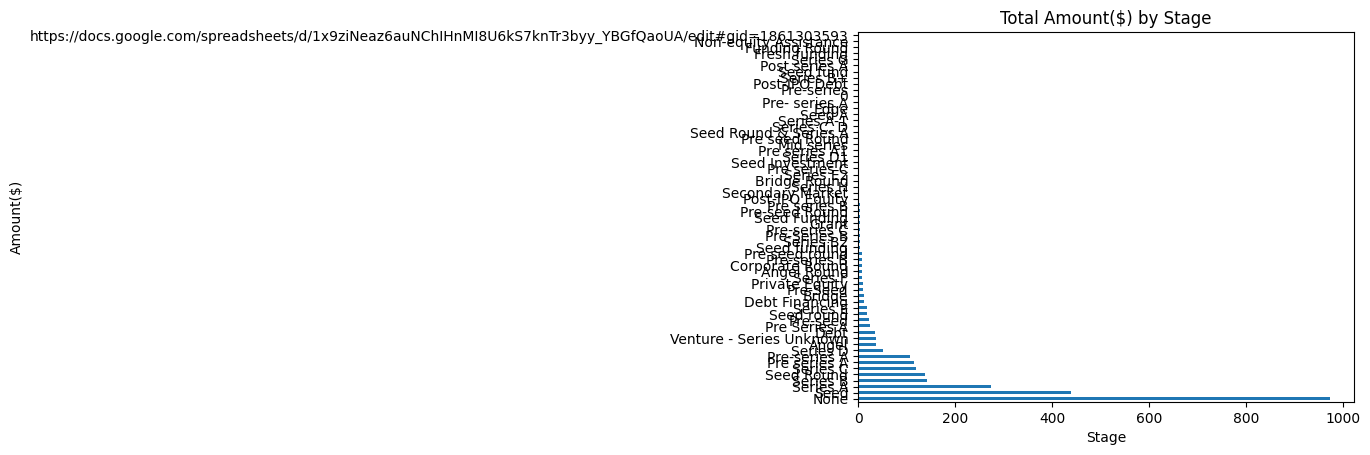

In [657]:
#df_combine['Stage'].value_counts().plot(kind='bar').head(10);

df_combine['Stage'].value_counts().plot(kind='barh')
plt.xlabel('Stage')
plt.ylabel('Amount($)')
plt.title('Total Amount($) by Stage')
plt.show()

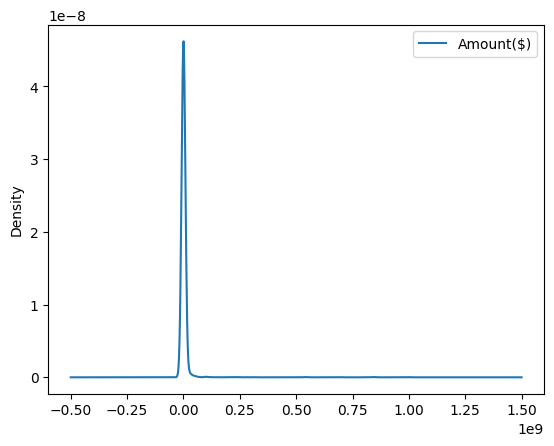

In [631]:
df_combine.plot(kind='density');

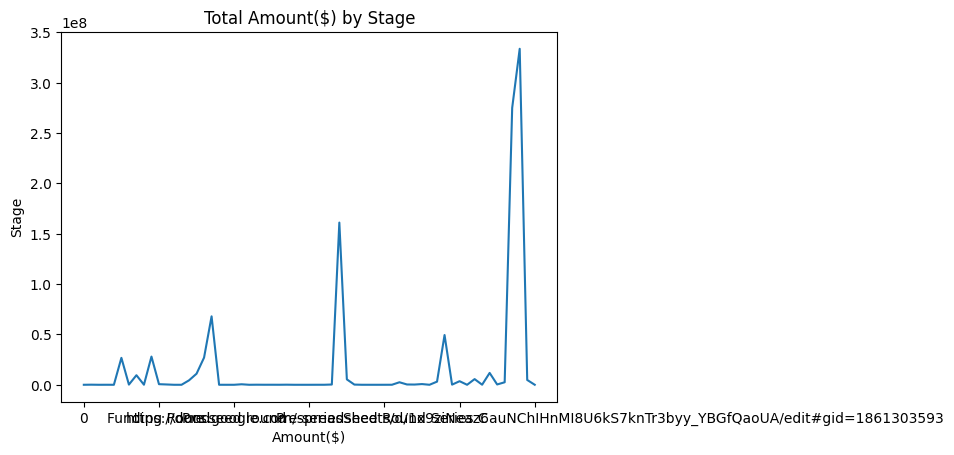

In [641]:
df_combine['Amount($)'].groupby(by=df_combine['Stage']).mean().plot(kind='line')

plt.xlabel('Amount($)')
plt.ylabel('Stage')
plt.title('Total Amount($) by Stage')
plt.show();

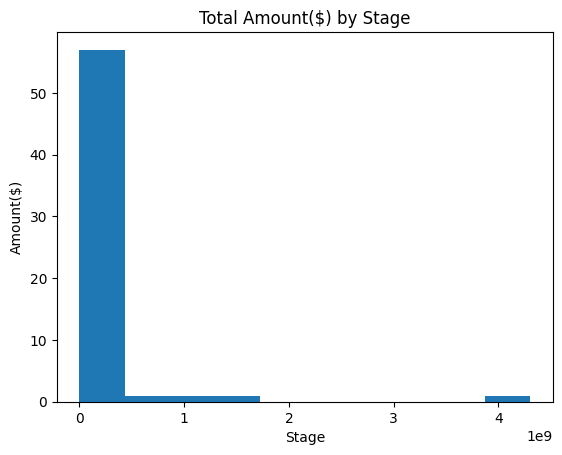

In [645]:
import matplotlib.pyplot as plt

df_combine.groupby(by=['Stage'])['Amount($)'].sum().plot(kind='hist')
plt.xlabel('Stage')
plt.ylabel('Amount($)')
plt.title('Total Amount($) by Stage')
plt.show()
